# Spin Chain Simulation


Notebook for analyzing spin simulation data:

- $L = 10$ spin sites
- Dynamics governed by unitary evolution with the Hamiltonian: 
$$ H = \sum \limits_{i}{\sigma^x_i \sigma^x_{i+1} + \sigma^y_i \sigma^y_{i+1} + \Delta \sigma^z_i \sigma^z_{i+1}}$$

With $\Delta = 0.2$ and time step $dt = 0.005$.

The system runs for $10^6$ timesteps and magnetization is recovered. 

The analysis will be done on the time series behavior of qubit 5.

In [2]:
import numpy as np
import dit
import matplotlib.pyplot as plt
import pandas as pd
import time
import InfoMeasures_Estimators as im
import scipy

%matplotlib inline

In [170]:
#load magnetization data from simulation as numpy arrays
magZ = np.load('Data/magZ.npy')
magY = np.load('Data/magY.npy')
magX = np.load('Data/magX.npy')

## 1. Generating sample chains from probability distributions

### Magnetization in the z-direction

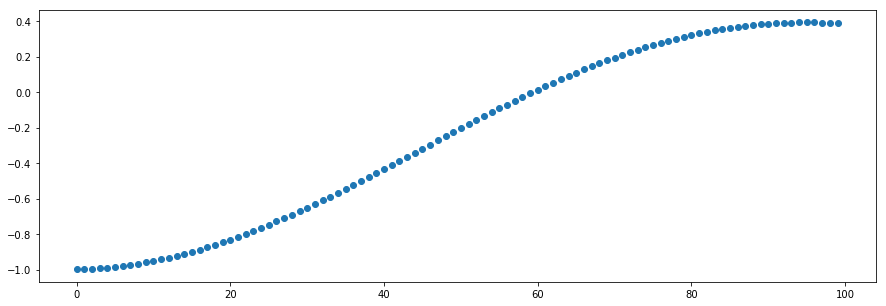

In [193]:
#plot some magnetization data to see that it looks right
fig1 = plt.figure(figsize=(15,5))
plt.plot(magZ[:100,5],'o')

Example: Qubit 5

In [15]:
#define np array with the corresponding probabilities of the qubit being in the z_up state
p_upsZ = (magZ[:, 5] + 1) /2

In [21]:
#define dit distributions for each time step with the probabilities of the 
#qubit being in the z_up = '0' state and the z_down ='1' state. 
#this is python list of dit distributions
distributionsZ = [dit.ScalarDistribution([0,1],[p_upsZ[i], 1- p_upsZ[i]]) for i in range(len(p_upsZ))]

KeyboardInterrupt: 

In [28]:
#create an empty numpy array to hold the results from colapsing the probabilties
#defined with dimensions to hold 10 different runs
simulationsZ = np.empty([10, 1000000], dtype='string')

In [33]:
#iterate over all dit distributions, take sample from each and add sample to the simulationsZ array
for run in range(len(simulationsZ)):
    #outer for loop runs 10 times and each time goes over entire array of distributions and takes samples
    sample = [d.rand() for d in distributionsZ]
    #samples are stored in simulationsZ
    simulationsZ[run] = sample

In [38]:
#results of 10 runs are stored in Zsims.npy
np.save('Zsims', simulationsZ)

#repeat the same for y and x magnetization

### Magnetization in the y-direction

In [39]:
p_upsY = (magY[:, 5] + 1)/2
distributionsY = [dit.Distribution(['0','1'],[p_upsY[i], 1- p_upsY[i]]) for i in range(len(p_upsY))]

In [40]:
simulationsY = np.empty([10, 1000000], dtype='string')
for run in range(len(simulationsY)):
    sample = [d.rand() for d in distributionsY]
    simulationsY[run] = sample
    
np.save('Ysims', simulationsY)

### Magnetization in the x-direction

In [41]:
p_upsX = (magX[:, 5] + 1)/2
distributionsX = [dit.Distribution(['0','1'],[p_upsX[i], 1- p_upsX[i]]) for i in range(len(p_upsX))]

In [42]:
simulationsX = np.empty([10, 1000000], dtype='string')
for run in range(len(simulationsX)):
    sample = [d.rand() for d in distributionsX]
    simulationsX[run] = sample
    
np.save('Xsims', simulationsX)

## 2. Load simulated data

In [3]:
Zsims = np.load('MC/Zsims.npy')
#Ysims = np.load('MC/Ysims.npy')
#Xsims = np.load('MC/Xsims.npy')

## 3. Analyze data along the Z axis

We are interested in the time-dependent probability distribution of a binary observable, like the central spin of a chain: $p_c^{\pm}(t_k)$. In order to get a sample, we performed a Monte-Carlo and extracted a value ($\left\{ 0,1\right\}$) at each time. This gives us a binary time-series of length $10^6$. We can then use the entropy estimators which are built in DIT to estimate the value of the entropy. Now, the entropy estimator has a bias $B(L,N) \leq \frac{2^L+1}{2N}$, where $2^L$ is the size of the alphabet and $N$ is the size of the sample. 
Now, the maximum value of the entropy is $1$ bit. Since we have $B(L=17,N=10^6) = 0.066$ and $B(L=18,N=10^6) = 0.13$, we should stop trusting the results after $L=17$ as the bias becomes too relevant. This means that we can investigate words that are up to length $L_{\mathrm{max}} = 17$.

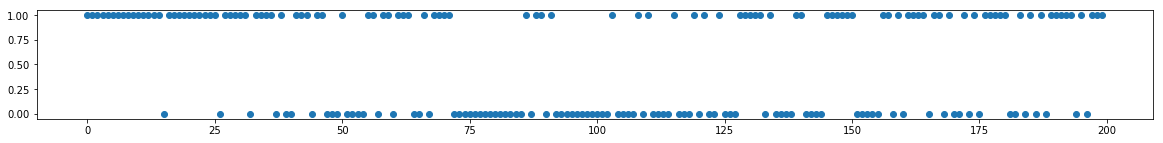

In [26]:
#look at the simulated data
fig2 = plt.figure(figsize=(20, 2))
plt.plot(Zsims[2][0:200],'o')
plt.show()

In [11]:
HH = np.zeros(21)
TT = np.zeros(21)
II = np.zeros(21)
BB = np.zeros(21)
RR = np.zeros(21)
WW = np.zeros(21)
QQ = np.zeros(21)
Time = np.zeros(21)
for k in range(21):
    start_time = time.time()
    HH[k] = dit.inference.entropy_2(Zsims[1,:], k+1) #Joint Entropy
    TT[k] = im.total_correlations_2(Zsims[1,:],k+1)  #Total Correlations
    II[k] = im.coinformation_2(Zsims[1,:],k+1)       #Co-Information or Multivariate Mutual Information
    BB[k] = im.binding_info_2(Zsims[1,:],k+2)        #Binding Information. Minimum value L=2
    RR[k] = im.residual_entropy_2(Zsims[1,:],k+2)    #Residual Entropy. Minimum value L=2
    WW[k] = im.exogenous_info_2(Zsims[1,:],k+2)      #Local exogenous information. Minimum value L=2
    QQ[k] = im.enigmatic_info_2(Zsims[1,:],k+2)      #Enigmatic information. Minimum value L=2
    Time[k] = time.time() - start_time
    print('Iteration L =',k+1,'Took t =',Time[k],' seconds')

Iteration L = 1 Took t = 4.96954107285  seconds
Iteration L = 2 Took t = 6.29118013382  seconds
Iteration L = 3 Took t = 7.7247338295  seconds
Iteration L = 4 Took t = 10.0818510056  seconds
Iteration L = 5 Took t = 12.1582379341  seconds
Iteration L = 6 Took t = 13.6040589809  seconds
Iteration L = 7 Took t = 17.2700488567  seconds
Iteration L = 8 Took t = 18.7598049641  seconds
Iteration L = 9 Took t = 20.4576759338  seconds
Iteration L = 10 Took t = 23.0368928909  seconds
Iteration L = 11 Took t = 26.2466418743  seconds
Iteration L = 12 Took t = 28.7328021526  seconds
Iteration L = 13 Took t = 32.5651569366  seconds
Iteration L = 14 Took t = 41.5865490437  seconds
Iteration L = 15 Took t = 53.49198699  seconds
Iteration L = 16 Took t = 75.5261089802  seconds
Iteration L = 17 Took t = 128.841140985  seconds
Iteration L = 18 Took t = 243.387984991  seconds
Iteration L = 19 Took t = 341.246045828  seconds
Iteration L = 20 Took t = 515.618125916  seconds
Iteration L = 21 Took t = 651.42

For all information measures, say $H(L)$, we look at two different indicators: $h_\mu^{(1)}(L):=\frac{H(L)}{L}$ and $h_\mu^{(2)}(L):=H(L)-H(L-1)$, to understand if they saturate.

In [88]:
h1 = np.zeros(20)
h2 = np.zeros(20)
t1 = np.zeros(20)
t2 = np.zeros(20)
i1 = np.zeros(20)
i2 = np.zeros(20)
b1 = np.zeros(19)
b2 = np.zeros(19)
r1 = np.zeros(19)
r2 = np.zeros(19)
w1 = np.zeros(19)
w2 = np.zeros(19)
q1 = np.zeros(19)
q2 = np.zeros(19)
for l in range(20):
    h1[l] = HH[l]/(l+1)
    h2[l] = HH[l+1]-HH[l]
    t1[l] = TT[l]/(l+1)
    t2[l] = TT[l+1] - TT[l]
    i1[l] = II[l]/(l+1)
    i2[l] = II[l+1] - II[l]
for l in range(19):
    b1[l] = BB[l]/(l+1)
    b2[l] = BB[l+1]-BB[l]
    r1[l] = RR[l]/(l+1)
    r2[l] = RR[l+1]-RR[l]
    w1[l] = WW[l]/(l+1)
    w2[l] = WW[l+1]-WW[l]
    q1[l] = QQ[l]/(l+1)
    q2[l] = QQ[l+1]-QQ[l]

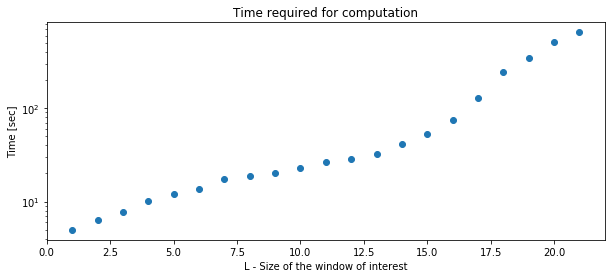

In [89]:
fig_time = plt.figure(figsize=(10, 4))
plt.plot(Size,Time,'o')
plt.ylabel('Time [sec]')
plt.yscale('log')
plt.xlabel('L - Size of the window of interest')
plt.title('Time required for computation')
plt.show()

It looks like the required time to compute the estimator for the entropy increases in a linear-ish weird way, as a function of the size of the window of interest. 

### Joint entropy $H(L)$ and Shannon entropy rate $h_\mu(L)$

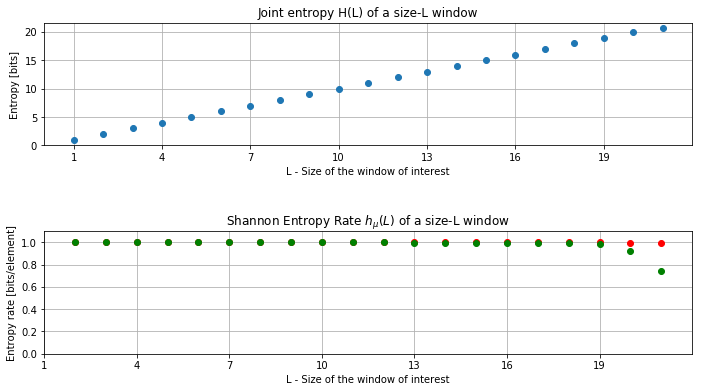

In [163]:
# Plot the Joint Entropy and the estimate of the Shannon Entropy Rate
plt.figure(1,figsize=(10, 5))
plt.subplot(211)
plt.plot(Size, HH, 'o')
plt.xticks(np.arange(1,22, 3.0))
plt.ylabel('Entropy [bits]')
plt.xlabel('L - Size of the window of interest')
plt.title('Joint entropy H(L) of a size-L window')
plt.grid(True)



plt.subplot(212)
plt.plot(Size[1:],h1,'ro')
plt.plot(Size[1:],h2,'go')
plt.axis([1, 22, 0, 1.1])
plt.xticks(np.arange(1,21, 3.0))
plt.ylabel('Entropy rate [bits/element]')
plt.xlabel('L - Size of the window of interest')
plt.title('Shannon Entropy Rate $h_\mu(L)$ of a size-L window')
plt.grid(True)
plt.subplots_adjust(top=1, bottom=0.08, left=0.50, right=1.4, hspace=0.7, wspace=0.35)
plt.show()

The transition that we observe after $L=17$ is due to the fact that we can trust the estimator as long as the size of whole set of words $2^L$ is smaller than our sample $N = 10^6$. Apart for some common sense, this is due to the fact that we are using an estimator that has a certain bias. 

In [162]:
Bias = ((2**17)+1)/(2*(10**6))
print('At L=17 the bias is B =',Bias,'while at L=18 it is B =',((2**18)+1)/(2*(10**6)))

At L=17 the bias is B = 0.0655365 while at L=18 it is B = 0.1310725


## Total correlations $T(L)$ and the rate $t_\mu(L)$

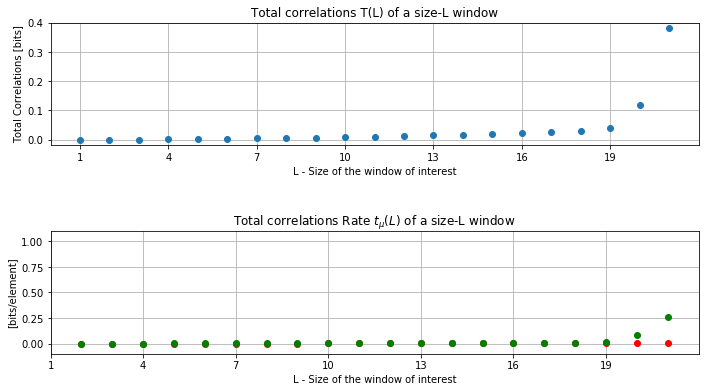

In [164]:
# Plot the Total correlations and the estimate of its rate $t_\mu(L)$
plt.figure(1,figsize=(10, 5))
plt.subplot(211)
plt.plot(Size, TT, 'o')
plt.xticks(np.arange(1,22, 3.0))
plt.ylabel('Total Correlations [bits]')
plt.xlabel('L - Size of the window of interest')
plt.title('Total correlations T(L) of a size-L window')
plt.grid(True)



plt.subplot(212)
plt.plot(Size[1:],t1,'ro')
plt.plot(Size[1:],t2,'go')
plt.axis([1, 22, -0.1, 1.1])
plt.xticks(np.arange(1,21, 3.0))
plt.ylabel('[bits/element]')
plt.xlabel('L - Size of the window of interest')
plt.title('Total correlations Rate $t_\mu(L)$ of a size-L window')
plt.grid(True)
plt.subplots_adjust(top=1, bottom=0.08, left=0.50, right=1.4, hspace=0.7, wspace=0.35)
plt.show()

### Co-Information $I(L)$ and the rate $i_\mu(L)$

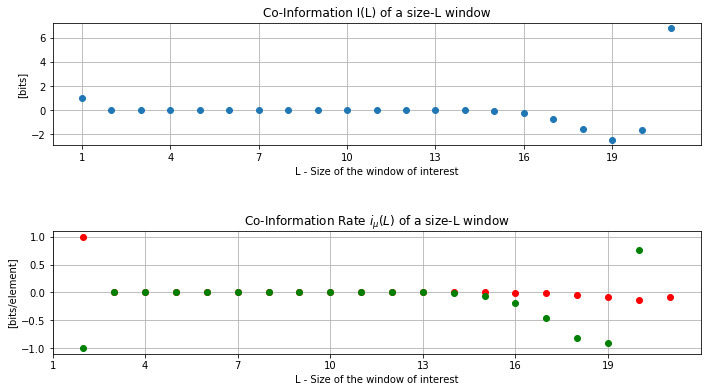

In [165]:
# Plot the Co-Information and the estimate of its rate $i_\mu(L)$
plt.figure(1,figsize=(10, 5))
plt.subplot(211)
plt.plot(Size, II, 'o')
plt.xticks(np.arange(1,22, 3.0))
plt.ylabel('[bits]')
plt.xlabel('L - Size of the window of interest')
plt.title('Co-Information I(L) of a size-L window')
plt.grid(True)



plt.subplot(212)
plt.plot(Size[1:],i1,'ro')
plt.plot(Size[1:],i2,'go')
plt.axis([1, 22, -1.1, 1.1])
plt.xticks(np.arange(1,21, 3.0))
plt.ylabel('[bits/element]')
plt.xlabel('L - Size of the window of interest')
plt.title('Co-Information Rate $i_\mu(L)$ of a size-L window')
plt.grid(True)
plt.subplots_adjust(top=1, bottom=0.08, left=0.50, right=1.4, hspace=0.7, wspace=0.35)
plt.show()

## Binding Information $B(L)$ and the rate $b_\mu(L)$

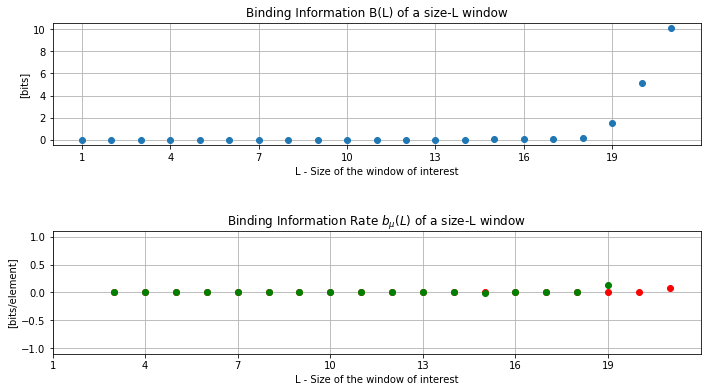

In [166]:
# Plot the Binding Information and the estimate of its rate $b_\mu(L)$
plt.figure(1,figsize=(10, 5))
plt.subplot(211)
plt.plot(Size, BB, 'o')
plt.xticks(np.arange(1,22, 3.0))
plt.ylabel('[bits]')
plt.xlabel('L - Size of the window of interest')
plt.title('Binding Information B(L) of a size-L window')
plt.grid(True)



plt.subplot(212)
plt.plot(Size[2:],b1,'ro')
plt.plot(Size[2:],b2,'go')
plt.axis([1, 22, -1.1, 1.1])
plt.xticks(np.arange(1,21, 3.0))
plt.ylabel('[bits/element]')
plt.xlabel('L - Size of the window of interest')
plt.title('Binding Information Rate $b_\mu(L)$ of a size-L window')
plt.grid(True)
plt.subplots_adjust(top=1, bottom=0.08, left=0.50, right=1.4, hspace=0.7, wspace=0.35)
plt.show()

## Residual Entropy $R(L)$ and the rate $r_\mu(L)$

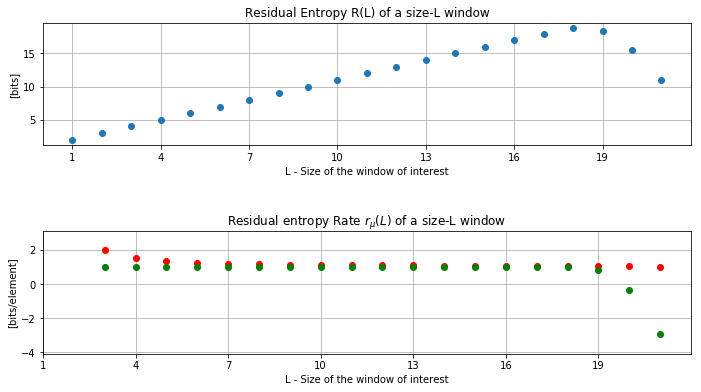

In [170]:
# Plot the Residual Entropy the estimate of its rate $r_\mu(L)$
plt.figure(1,figsize=(10, 5))
plt.subplot(211)
plt.plot(Size, RR, 'o')
plt.xticks(np.arange(1,22, 3.0))
plt.ylabel('[bits]')
plt.xlabel('L - Size of the window of interest')
plt.title('Residual Entropy R(L) of a size-L window')
plt.grid(True)



plt.subplot(212)
plt.plot(Size[2:],r1,'ro')
plt.plot(Size[2:],r2,'go')
plt.axis([1, 22, -4.1, 3.1])
plt.xticks(np.arange(1,21, 3.0))
plt.ylabel('[bits/element]')
plt.xlabel('L - Size of the window of interest')
plt.title('Residual entropy Rate $r_\mu(L)$ of a size-L window')
plt.grid(True)
plt.subplots_adjust(top=1, bottom=0.08, left=0.50, right=1.4, hspace=0.7, wspace=0.35)
plt.show()

## Local exogenous information $W(L)$ and the rate $w_\mu(L)$

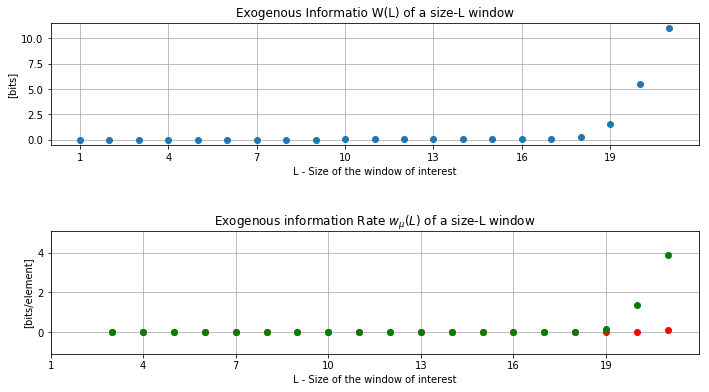

In [172]:
# Plot the Residual Entropy the estimate of its rate $r_\mu(L)$
plt.figure(1,figsize=(10, 5))
plt.subplot(211)
plt.plot(Size, WW, 'o')
plt.xticks(np.arange(1,22, 3.0))
plt.ylabel('[bits]')
plt.xlabel('L - Size of the window of interest')
plt.title('Exogenous Informatio W(L) of a size-L window')
plt.grid(True)



plt.subplot(212)
plt.plot(Size[2:],w1,'ro')
plt.plot(Size[2:],w2,'go')
plt.axis([1, 22, -1.1, 5.1])
plt.xticks(np.arange(1,21, 3.0))
plt.ylabel('[bits/element]')
plt.xlabel('L - Size of the window of interest')
plt.title('Exogenous information Rate $w_\mu(L)$ of a size-L window')
plt.grid(True)
plt.subplots_adjust(top=1, bottom=0.08, left=0.50, right=1.4, hspace=0.7, wspace=0.35)
plt.show()

## Enigmatic information $Q(L)$ and the rate $q_\mu(L)$

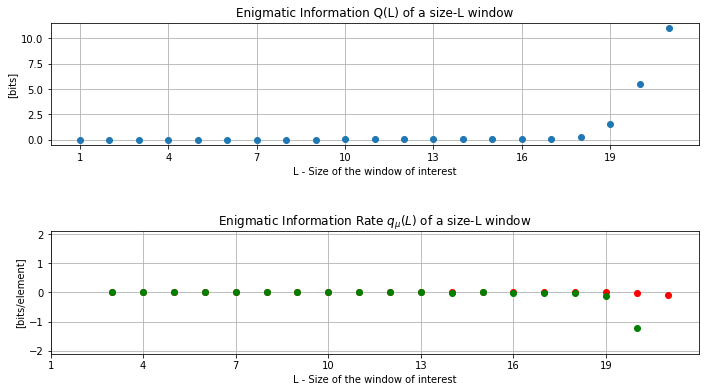

In [169]:
# Plot the Enigmatic Information and the estimate of its rate $q_\mu(L)$
plt.figure(1,figsize=(10, 5))
plt.subplot(211)
plt.plot(Size, WW, 'o')
plt.xticks(np.arange(1,22, 3.0))
plt.ylabel('[bits]')
plt.xlabel('L - Size of the window of interest')
plt.title('Enigmatic Information Q(L) of a size-L window')
plt.grid(True)



plt.subplot(212)
plt.plot(Size[2:],q1,'ro')
plt.plot(Size[2:],q2,'go')
plt.axis([1, 22, -2.1, 2.1])
plt.xticks(np.arange(1,21, 3.0))
plt.ylabel('[bits/element]')
plt.xlabel('L - Size of the window of interest')
plt.title('Enigmatic Information Rate $q_\mu(L)$ of a size-L window')
plt.grid(True)
plt.subplots_adjust(top=1, bottom=0.08, left=0.50, right=1.4, hspace=0.7, wspace=0.35)
plt.show()